# Case Study: How Does a Bike-Share Navigate Speedy Success?

![Cyclistic Logo](https://media-exp1.licdn.com/dms/image/C4E12AQFKlj6Wndw18Q/article-cover_image-shrink_600_2000/0/1637344484927?e=2147483647&v=beta&t=RsIjijwxg_4_YA3zgnueh8GJtYlGWLuFMKOqpZp80a0)

# Case Study Roadmap

1. Introduction
2. Ask Phase
3. Prepare Phase
4. Process Phase
5. Analyze Phase and Share Phase
6. Act Phase

# 1. Introduction

Welcome to the Cyclistic bike-share analysis case study! In this case study, you will perform many real-world tasks of a junior data analyst. You will work for a fictional company, Cyclistic, and meet different characters and team members. In order to answer the key business questions, you will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

**Scenario**
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# 2. Ask Phase

**Lily Moreno:** The director of marketing and your manager has assigned you the first question to answer: **How do annual members and casual riders use Cyclistic bikes differently?**

You will produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

# 3. Prepare Phase

**Loading the Data**

Access to the data is been provided. On exploring the data storage, I have noticed multiple year wise data present. As I will be working on 12 months period, data of 2021 (Jan to Dec) is exported for my case study analysis.

I have downloaded the necessary data and created the dataset in kaggle, link to dataset is [here](www.kaggle.com/dataset/b9daa54188647ce226ba0043172ea0e0a9bd092bec4cfffe8d8af9503a31a68f). 

> Before loading the data, I will be loading the required packages which will be used in this case study.


In [1]:
options(warn=-1) #ignore warnings - remove this if you don't need it

library(lubridate)
library(tidyverse)
library(ggplot2)
library(scales)
library(patchwork)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




> Now, I will be reading all the raw data using the for loop.

In [2]:
myFiles <- list.files("../input/cyclistic-2021-dataset")
myFiles

for (i in 1:length(myFiles)) {
  assign(paste0("tripdata_2021_",i), read.csv(paste0("../input/cyclistic-2021-dataset/",myFiles[i])))
}

[1] "202101-divvy-tripdata.csv" "202102-divvy-tripdata.csv"
 [3] "202103-divvy-tripdata.csv" "202104-divvy-tripdata.csv"
 [5] "202105-divvy-tripdata.csv" "202106-divvy-tripdata.csv"
 [7] "202107-divvy-tripdata.csv" "202108-divvy-tripdata.csv"
 [9] "202109-divvy-tripdata.csv" "202110-divvy-tripdata.csv"
[11] "202111-divvy-tripdata.csv" "202112-divvy-tripdata.csv"

> All the month wise data is been read and stored in myFiles.
> 
> All the month wise data needs to be mereged into a single dataframe.

In [3]:
tripdata_2021 <- rbind(tripdata_2021_1, tripdata_2021_2, tripdata_2021_3, tripdata_2021_4, tripdata_2021_5, tripdata_2021_6, tripdata_2021_7, tripdata_2021_8, tripdata_2021_9, tripdata_2021_10, tripdata_2021_11, tripdata_2021_12)

> A glimpse of the merged dataframe shows us:
> 
> A total of 13 columns and more than 5 million of rows.

In [4]:
glimpse(tripdata_2021)
head(tripdata_2021)

Rows: 5,595,063
Columns: 13
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-01-23 16:14:19", "2021-01-27 18:43:08", "2021…
$ ended_at           <chr> "2021-01-23 16:24:44", "2021-01-27 18:47:12", "2021…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Wood St & Augu…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "657", "13258",…
$ start_lat          <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.700…
$ member_cas

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


# 4. Process Phase

The data which is been provided, is an internal data of the company. Which indicates that the data is a clean data.

After exploring the data, I have decided on the cleaning steps needed in this case study and they are as follows:

> 1. Changing the datatype of the column *started_at* and *ended_at*. 
> 2. Removing the duplicate values.
> 3. Checking and verifying the columns *rideable_type* and *member_casual*.
> 4. Creating column for Ride Length, Weekday and Month-Year.
> 5. Checking and verifying the calculated column of Ride Length.

**1. Changing the datatype of the column *started_at* and *ended_at*.**

> The column started_at and ended_at are having character data type.
> 
> Converting the columns to date-time datatype and displaying few rows of the dataframe.

In [5]:
tripdata_2021$started_at <- as.POSIXct(tripdata_2021$started_at, "%Y-%m-%d %H:%M:%S", tz = "America/Chicago")

tripdata_2021$ended_at <- as.POSIXct(tripdata_2021$ended_at, "%Y-%m-%d %H:%M:%S", tz = "America/Chicago")

head(tripdata_2021)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


**2. Removing the duplicate values.**

> The Column *ride_id* is the primary key of this dataframe, so all the data needs to be unique. 
>  
> We will run a duplicate check to see whether we find and remove duplicate values.

In [6]:
tripdata_2021_nodup <- tripdata_2021[!duplicated(tripdata_2021$ride_id),]

print(paste("Total no. of duplicate rows found and removed:", nrow(tripdata_2021) - nrow(tripdata_2021_nodup))) 

[1] "Total no. of duplicate rows found and removed: 0"


**3. Checking and verifying the columns *rideable_type* and *member_casual*.**

> Both the columns should only contain certain values which have been specified by the company.
> 
> Ride type should only contain Electric Bike, Classic Bike and Docked Bike, and customers should be only the members and casual.

In [7]:
unique(tripdata_2021_nodup[c("rideable_type", "member_casual")])

,rideable_type,member_casual
,<chr>,<chr>
1,electric_bike,member
5,electric_bike,casual
10,classic_bike,member
14,classic_bike,casual
85,docked_bike,casual
30791,docked_bike,member


**4. Creating column for Ride Length, Weekday and Month-Year.**

> This new columns will help in further analysis and ploting.
> * Ride length will show the total duration of the bicycle ride or booking done by the customer.
> * Weekday and month-year will help in categorising the data in specific range.

In [8]:
tripdata_2021_nodup <- tripdata_2021_nodup %>% 
  mutate(total_ride_time = ended_at - started_at)

tripdata_2021_nodup <- tripdata_2021_nodup %>% 
  mutate(week_of_day = format(started_at, format = "%u-%a"), 
         month_year = paste(format(started_at, format = "%m-%Y"),format(started_at, format = "(%b)")))

head(tripdata_2021_nodup)
tail(tripdata_2021_nodup)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_ride_time,week_of_day,month_year
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member,625 secs,6-Sat,01-2021 (Jan)
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member,244 secs,3-Wed,01-2021 (Jan)
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member,80 secs,4-Thu,01-2021 (Jan)
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member,702 secs,4-Thu,01-2021 (Jan)
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual,43 secs,6-Sat,01-2021 (Jan)
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual,3227 secs,6-Sat,01-2021 (Jan)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,total_ride_time,week_of_day,month_year
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>,<chr>
5595058,92BBAB97D1683D69,electric_bike,2021-12-24 15:42:09,2021-12-24 19:29:35,Canal St & Madison St,13341,,,41.88180,-87.63997,41.88000,-87.64000,casual,13646 secs,5-Fri,12-2021 (Dec)
5595059,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,,,41.88229,-87.63975,41.89000,-87.61000,casual,1153 secs,7-Sun,12-2021 (Dec)
5595060,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.88212,-87.64005,41.88911,-87.63886,member,421 secs,1-Mon,12-2021 (Dec)
5595061,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.88196,-87.63995,41.88025,-87.62960,member,497 secs,4-Thu,12-2021 (Dec)
5595062,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,,,41.86000,-87.72000,41.85000,-87.71000,member,853 secs,1-Mon,12-2021 (Dec)
5595063,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,TA1309000002,Dearborn St & Monroe St,TA1305000006,41.87785,-87.62408,41.88132,-87.62952,member,217 secs,1-Mon,12-2021 (Dec)


**5. Checking and verifying the calculated column of Ride Length.**

> * The Ride length needs to be only in postive values, it can't contain any negative or nil values.This might be with the error in the system while entering and storing the data for booking the bicycle.
> 
> * Currently, the data in ride length is in time difference format for which we need to convert it in numeric format and then convert it from secs to mins.

In [9]:
glimpse(unique(subset(tripdata_2021_nodup, total_ride_time <= 0)))

tripdata_2021_cleaned <- subset(tripdata_2021_nodup, total_ride_time > 0 )

Rows: 653
Columns: 16
$ ride_id            <chr> "FC1EFEF4475D7F56", "6B51296F8E269F2F", "B1235D38EB…
$ rideable_type      <chr> "classic_bike", "classic_bike", "electric_bike", "c…
$ started_at         <dttm> 2021-01-09 15:42:45, 2021-01-15 16:40:47, 2021-01-…
$ ended_at           <dttm> 2021-01-09 15:41:02, 2021-01-15 16:40:47, 2021-01-…
$ start_station_name <chr> "Monticello Ave & Irving Park Rd", "Damen Ave & Tho…
$ start_station_id   <chr> "KA1504000139", "TA1307000070", "TA1306000010", "13…
$ end_station_name   <chr> "", "", "", "Loomis St & Lexington St", "", "", "",…
$ end_station_id     <chr> "", "", "", "13332", "", "", "", "TA1306000012", "K…
$ start_lat          <dbl> 41.95400, 41.90131, 41.88394, 41.87219, 41.88861, 4…
$ start_lng          <dbl> -87.71913, -87.67741, -87.62931, -87.66150, -87.644…
$ end_lat            <dbl> NA, 41.90000, 41.88000, 41.87219, 41.89000, 41.9800…
$ end_lng            <dbl> NA, -87.68000, -87.63000, -87.66150, -87.64000, -87…
$ member_casual   

In [10]:
print(paste("Do we have any negative or nil values in ride length after cleaning it? : ",unique(tripdata_2021_cleaned$total_ride_time <= 0)))
print("*FALSE indicates that there are no values to show*")

[1] "Do we have any negative or nil values in ride length after cleaning it? :  FALSE"
[1] "*FALSE indicates that there are no values to show*"


In [11]:
tripdata_2021_cleaned$total_ride_time <- as.numeric(tripdata_2021_cleaned$total_ride_time)
tripdata_2021_cleaned$total_ride_time <- tripdata_2021_cleaned$total_ride_time / 60
glimpse(tripdata_2021_cleaned)

Rows: 5,594,410
Columns: 16
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-01-23 16:14:19, 2021-01-27 18:43:08, 2021-01-…
$ ended_at           <dttm> 2021-01-23 16:24:44, 2021-01-27 18:47:12, 2021-01-…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Wood St & Augu…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "657", "13258",…
$ start_lat          <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.700…
$ member_cas

# 5. Analyze Phase and Share Phase

Now that the data is completly clean and ready for analysis, I can make more descriptive analysis and plot graph accordingly to find an answer for our objective: How do annual members and casual riders use Cyclistic bikes differently?

> Lets check the calculative values of ride length.

In [12]:
#setting theme font for all plots
global_theme <- theme(text = element_text(size = 20))

In [13]:
#transfering the data to a easy name
tripdata <- tripdata_2021_cleaned
glimpse(tripdata)

Rows: 5,594,410
Columns: 16
$ ride_id            <chr> "E19E6F1B8D4C42ED", "DC88F20C2C55F27F", "EC45C94683…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-01-23 16:14:19, 2021-01-27 18:43:08, 2021-01-…
$ ended_at           <dttm> 2021-01-23 16:24:44, 2021-01-27 18:47:12, 2021-01-…
$ start_station_name <chr> "California Ave & Cortez St", "California Ave & Cor…
$ start_station_id   <chr> "17660", "17660", "17660", "17660", "17660", "17660…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "Wood St & Augu…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "657", "13258",…
$ start_lat          <dbl> 41.90034, 41.90033, 41.90031, 41.90040, 41.90033, 4…
$ start_lng          <dbl> -87.69674, -87.69671, -87.69664, -87.69666, -87.696…
$ end_lat            <dbl> 41.89000, 41.90000, 41.90000, 41.92000, 41.90000, 4…
$ end_lng            <dbl> -87.72000, -87.69000, -87.70000, -87.69000, -87.700…
$ member_cas

In [14]:
summary(tripdata$total_ride_time)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     6.75    12.00    21.94    21.78 55944.15 

1. **Comparing members and casual data.**

> First we will check the total no. of customer respective to members and casual.

member_casual,customer,percent %
<chr>,<int>,<dbl>
casual,2528664,45.19983
member,3065746,54.80017


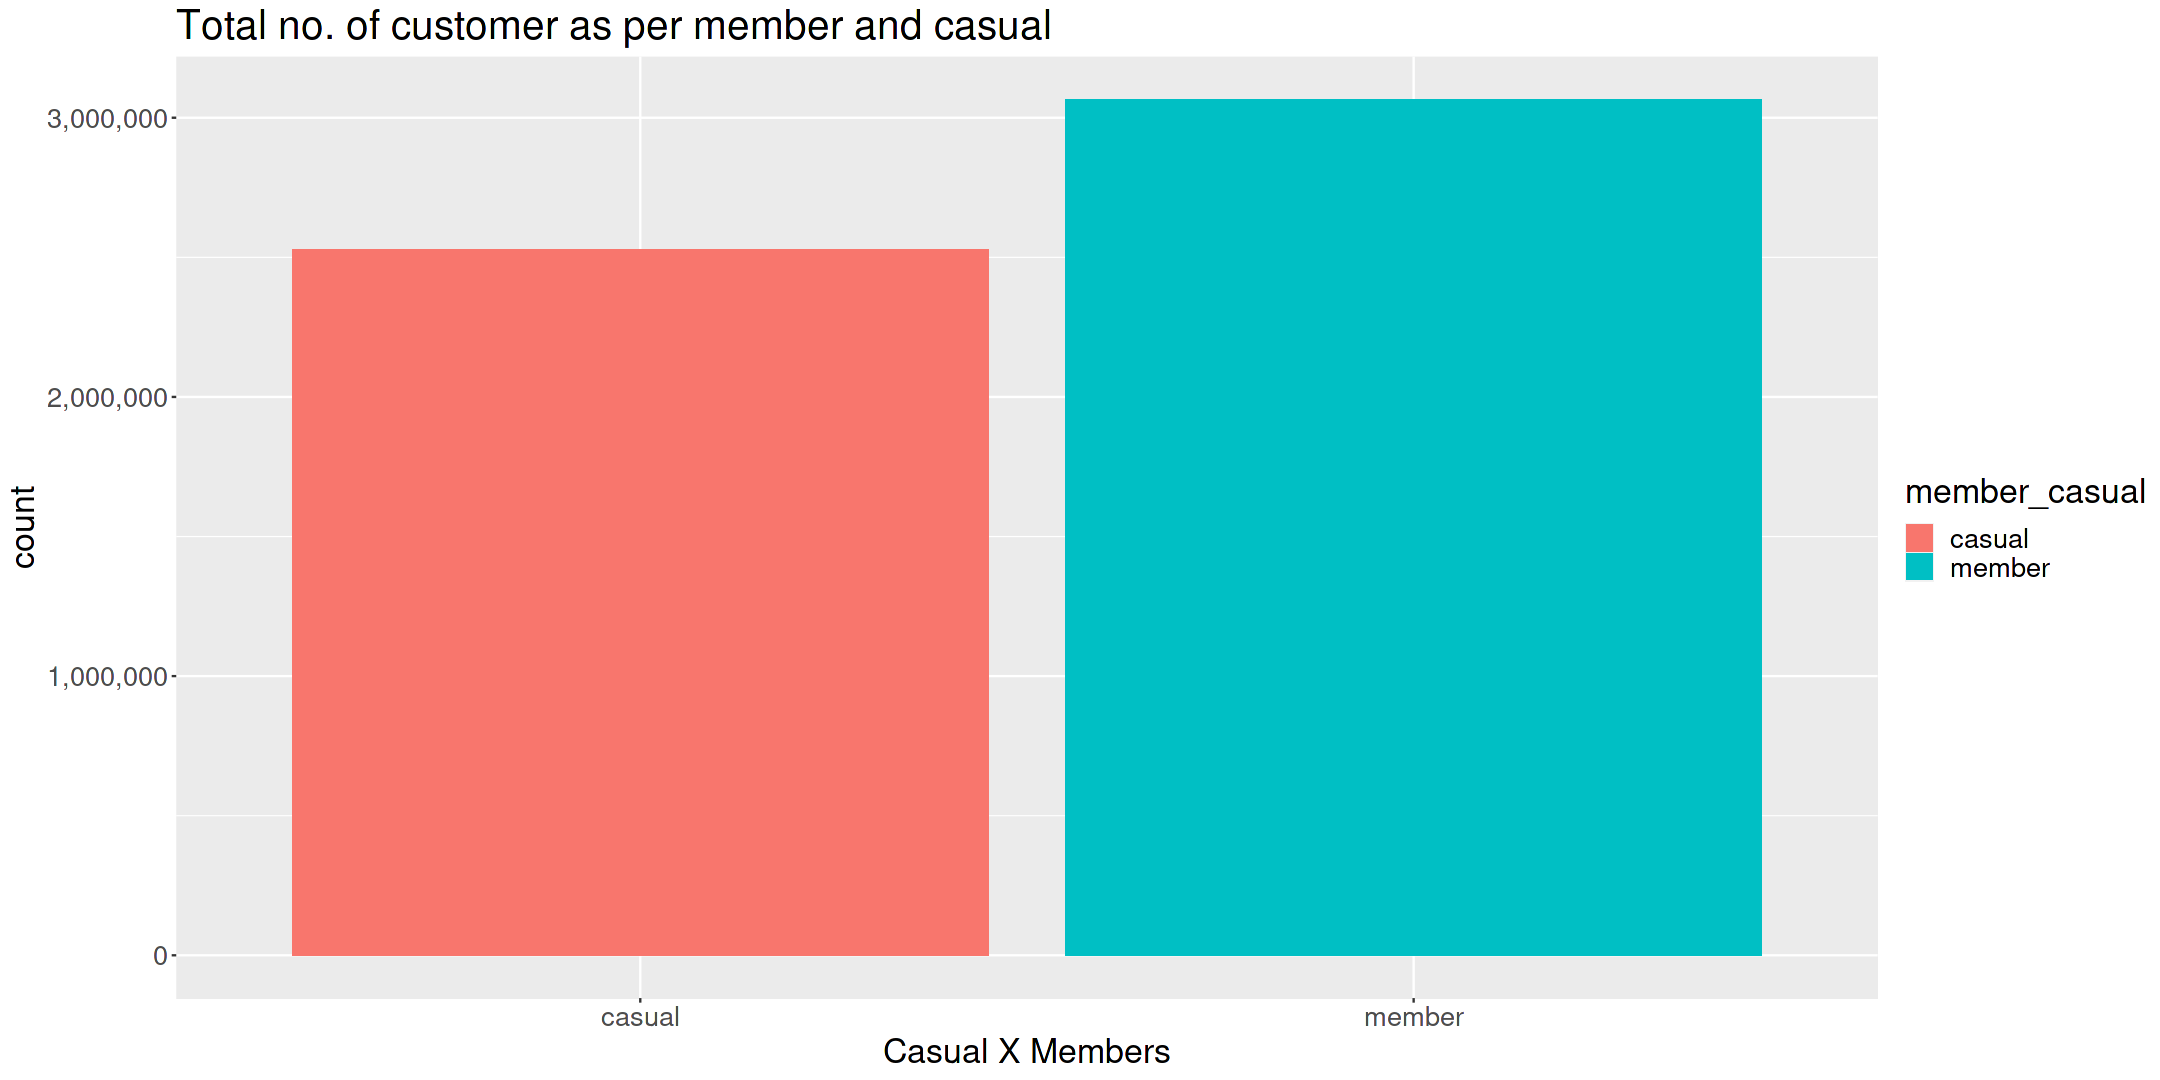

In [15]:
tripdata %>% 
  group_by(member_casual) %>% 
  summarise(customer = length(ride_id), "percent %" = (length(ride_id) / nrow(tripdata)) * 100)

#changing the default size
fig <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}

fig(18,9)
ggplot(data = tripdata) +
geom_bar(mapping = aes(x = member_casual, fill = member_casual)) +
labs(title = "Total no. of customer as per member and casual", x = "Casual X Members") +
scale_y_continuous(labels = scales::comma) +
global_theme


*This shows us that the major customer base is towards the members while not much less, a good no. of casual customers are present. Which indicates that the objective to turn casual to members is worth it.*

2. **Calculating Customers as per Bicycle Type**

> Lets check which bicycle type is favourite for which type of customer?

rideable_type,total_customer,percent %,member,casual
<chr>,<int>,<dbl>,<int>,<int>
classic_bike,3250746,58.107039,1984219,1266527
docked_bike,312335,5.582984,1,312334
electric_bike,2031329,36.309977,1081526,949803


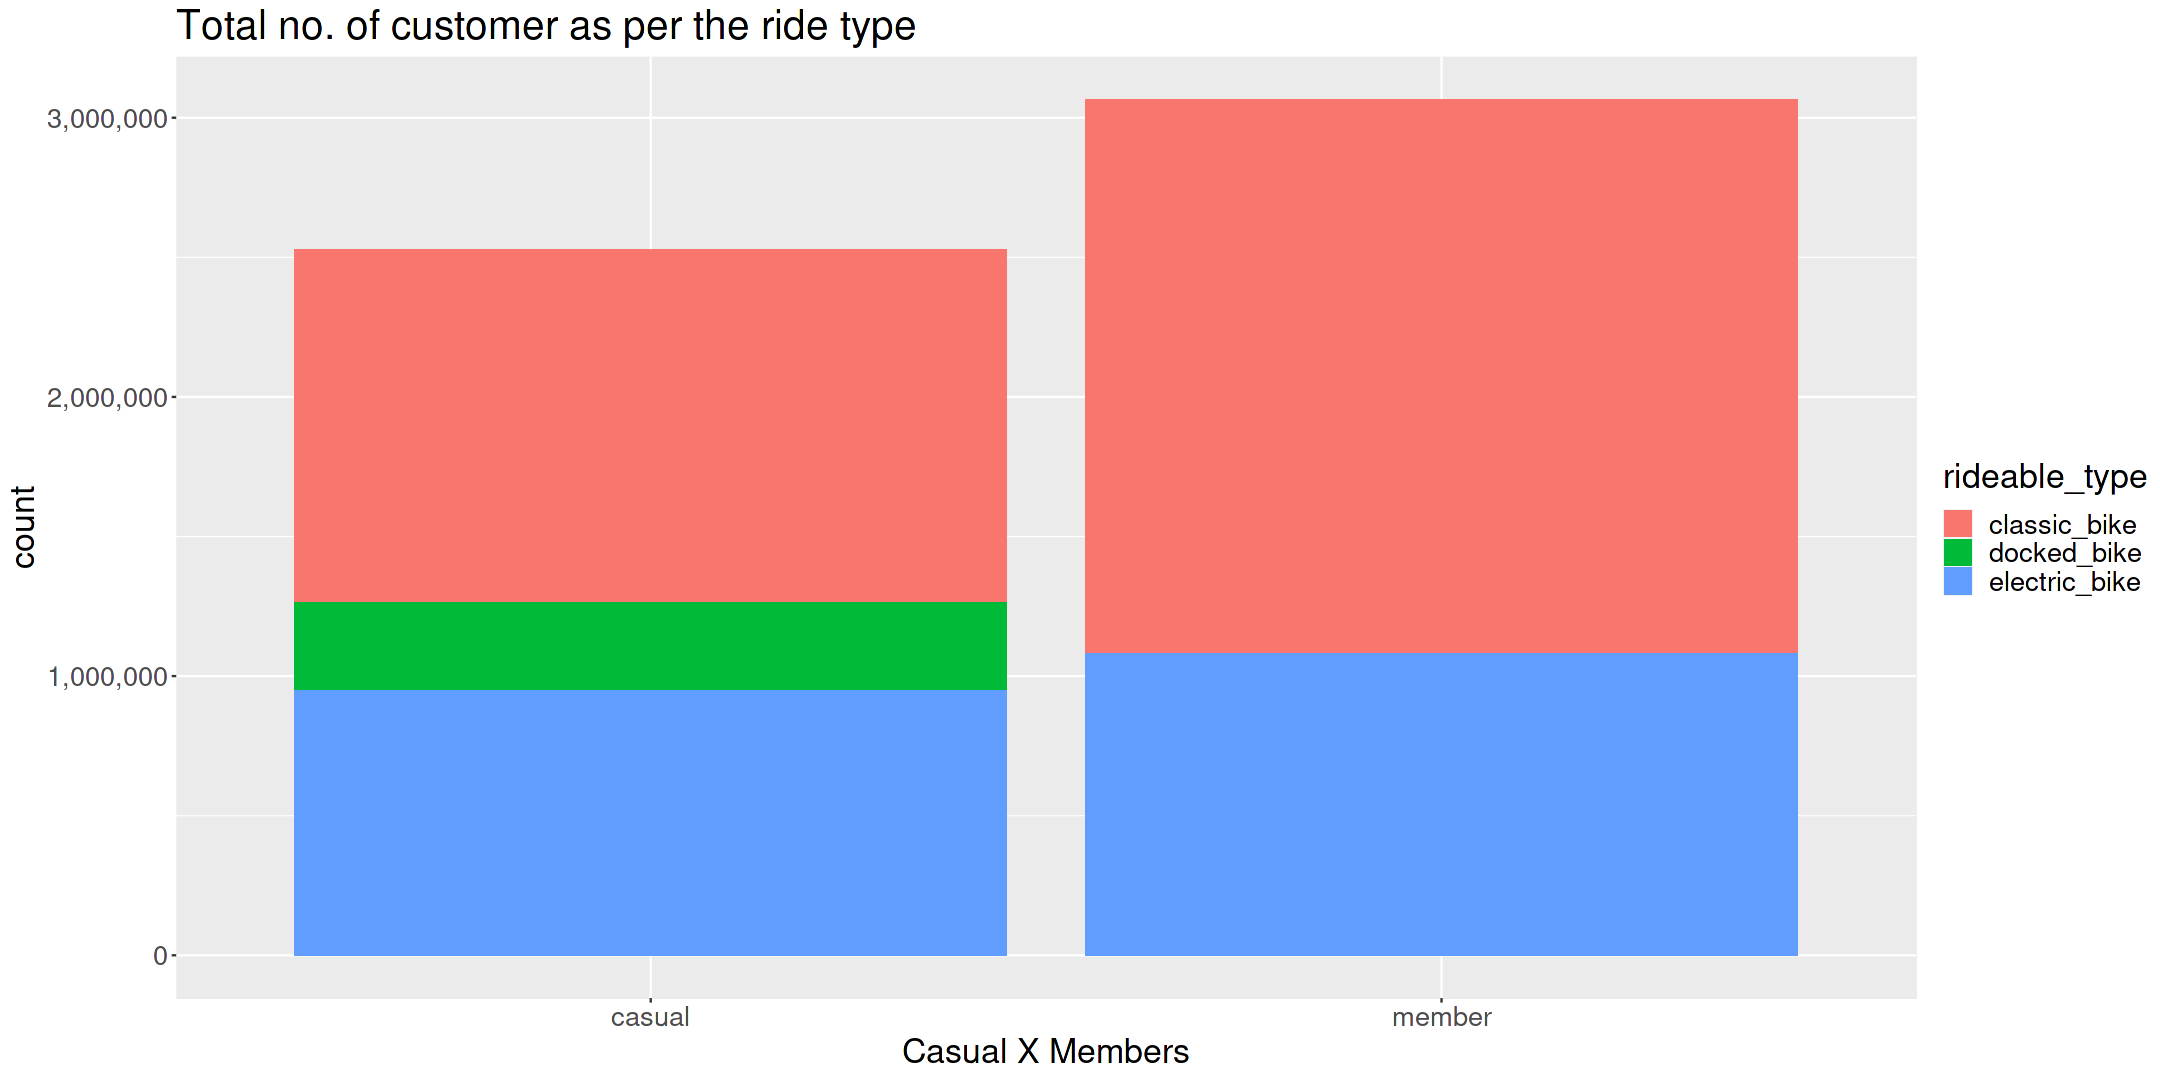

In [16]:
tripdata %>% 
  group_by(rideable_type) %>% 
  summarise(total_customer = length(ride_id), 
           "percent %" = (length(ride_id) / nrow(tripdata)) * 100,
           member = sum(member_casual == "member"),
           casual = sum(member_casual == "casual"))

ggplot(data = tripdata) +
geom_bar(mapping = aes(x = member_casual, fill = rideable_type)) +
labs(title = "Total no. of customer as per the ride type", x = "Casual X Members") + 
scale_y_continuous(labels = scales::comma) +
global_theme

*This shows us that casual members use all the bicycle with the most of classic and electric, and members are only interested in classic and electric*

3. **Overall Customers for Every Month**

> Lets check the numbers distribute for month wise between members and casual.

month_year,total_customer,percent %,member,member %,casual,casual %
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
01-2021 (Jan),96828,1.7307991,78711,81.28950,18117,18.71050
02-2021 (Feb),49618,0.8869211,39488,79.58402,10130,20.41598
03-2021 (Mar),228484,4.0841483,144456,63.22368,84028,36.77632
04-2021 (Apr),337192,6.0273023,200602,59.49192,136590,40.50808
05-2021 (May),531579,9.5019671,274691,51.67454,256888,48.32546
06-2021 (Jun),729529,13.0403206,358893,49.19517,370636,50.80483
07-2021 (Jul),822328,14.6991014,380317,46.24882,442011,53.75118
08-2021 (Aug),804245,14.3758681,391637,48.69623,412608,51.30377
09-2021 (Sep),756040,13.5142044,392200,51.87556,363840,48.12444


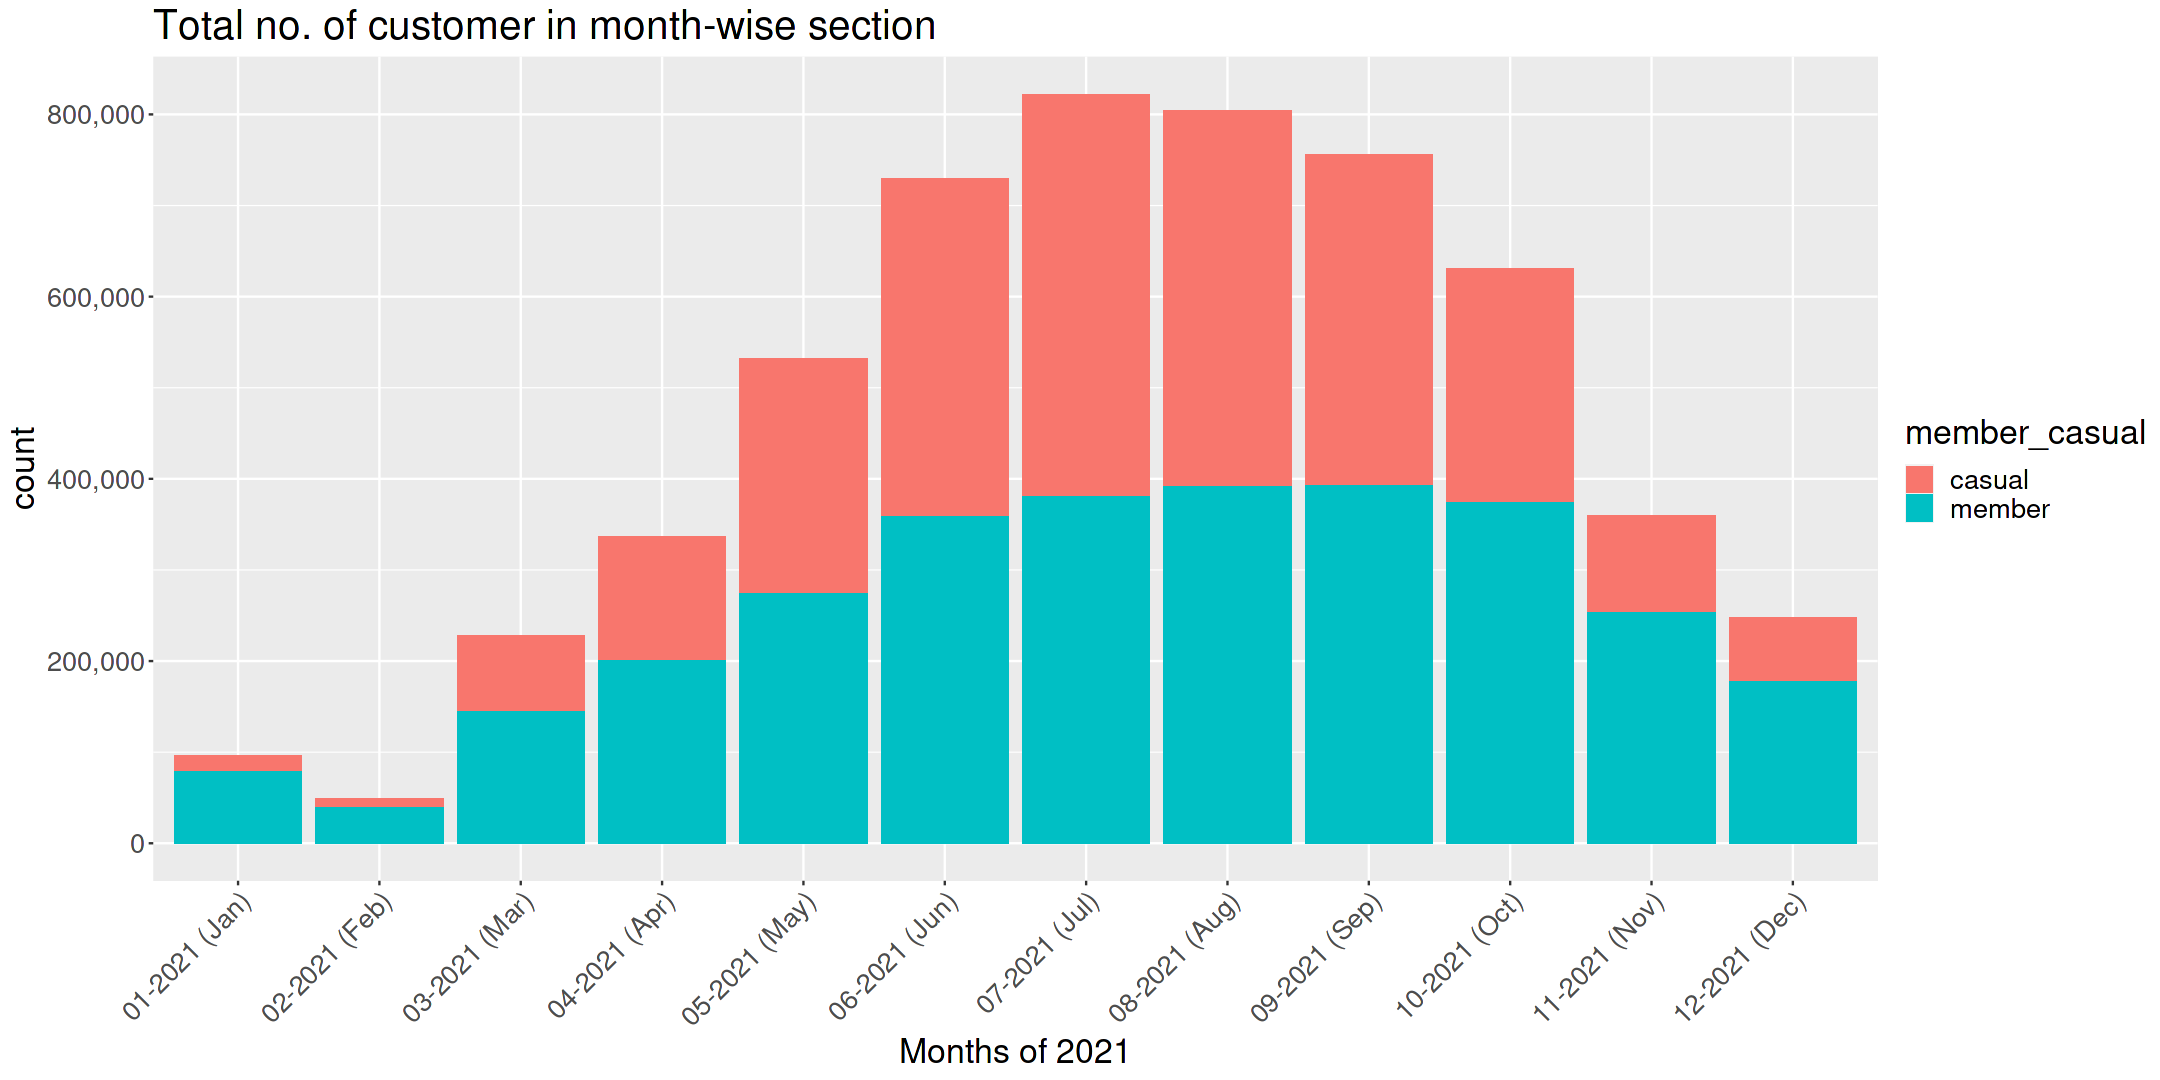

In [17]:
tripdata %>% 
  group_by(month_year) %>% 
  summarise(total_customer = length(ride_id), 
           "percent %" = (length(ride_id) / nrow(tripdata)) * 100,
            member = sum(member_casual == "member"),
           "member %" = member / length(ride_id) * 100,
            casual = sum(member_casual == "casual"),
           "casual %" = casual / length(ride_id) * 100)

ggplot(data = tripdata) +
geom_bar(mapping = aes(x = month_year, fill = member_casual)) +
labs(title = "Total no. of customer in month-wise section", x = "Months of 2021") + 
scale_y_continuous(labels = scales::comma) +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
global_theme

*Points understood from this graph:*
* *Highest customers are in the month of July.*
* *The range of months with maximum customers are from May to Oct.*
* *The rest of the period shows huge difference between the members and casual, where members are more active than the casuals.*
* *During the months - June, July and August, casual are more than members which shows a great potential for turnaround.*

4. **Chicago Temperature for the Whole Year(Avg)**

> The above month-wise graph explains the rise and fall of the customer in their specific month, but we can understand the reason behind this by comparing it with the temperature during those period.

month,temp_f,temp_c
<chr>,<dbl>,<dbl>
01-Jan,27,-2.78
02-Feb,30,-1.11
03-Mar,39,3.89
04-Apr,49,9.44
05-May,59,15.00
06-Jun,70,21.11
07-Jul,76,24.44
08-Aug,75,23.89
09-Sep,67,19.44


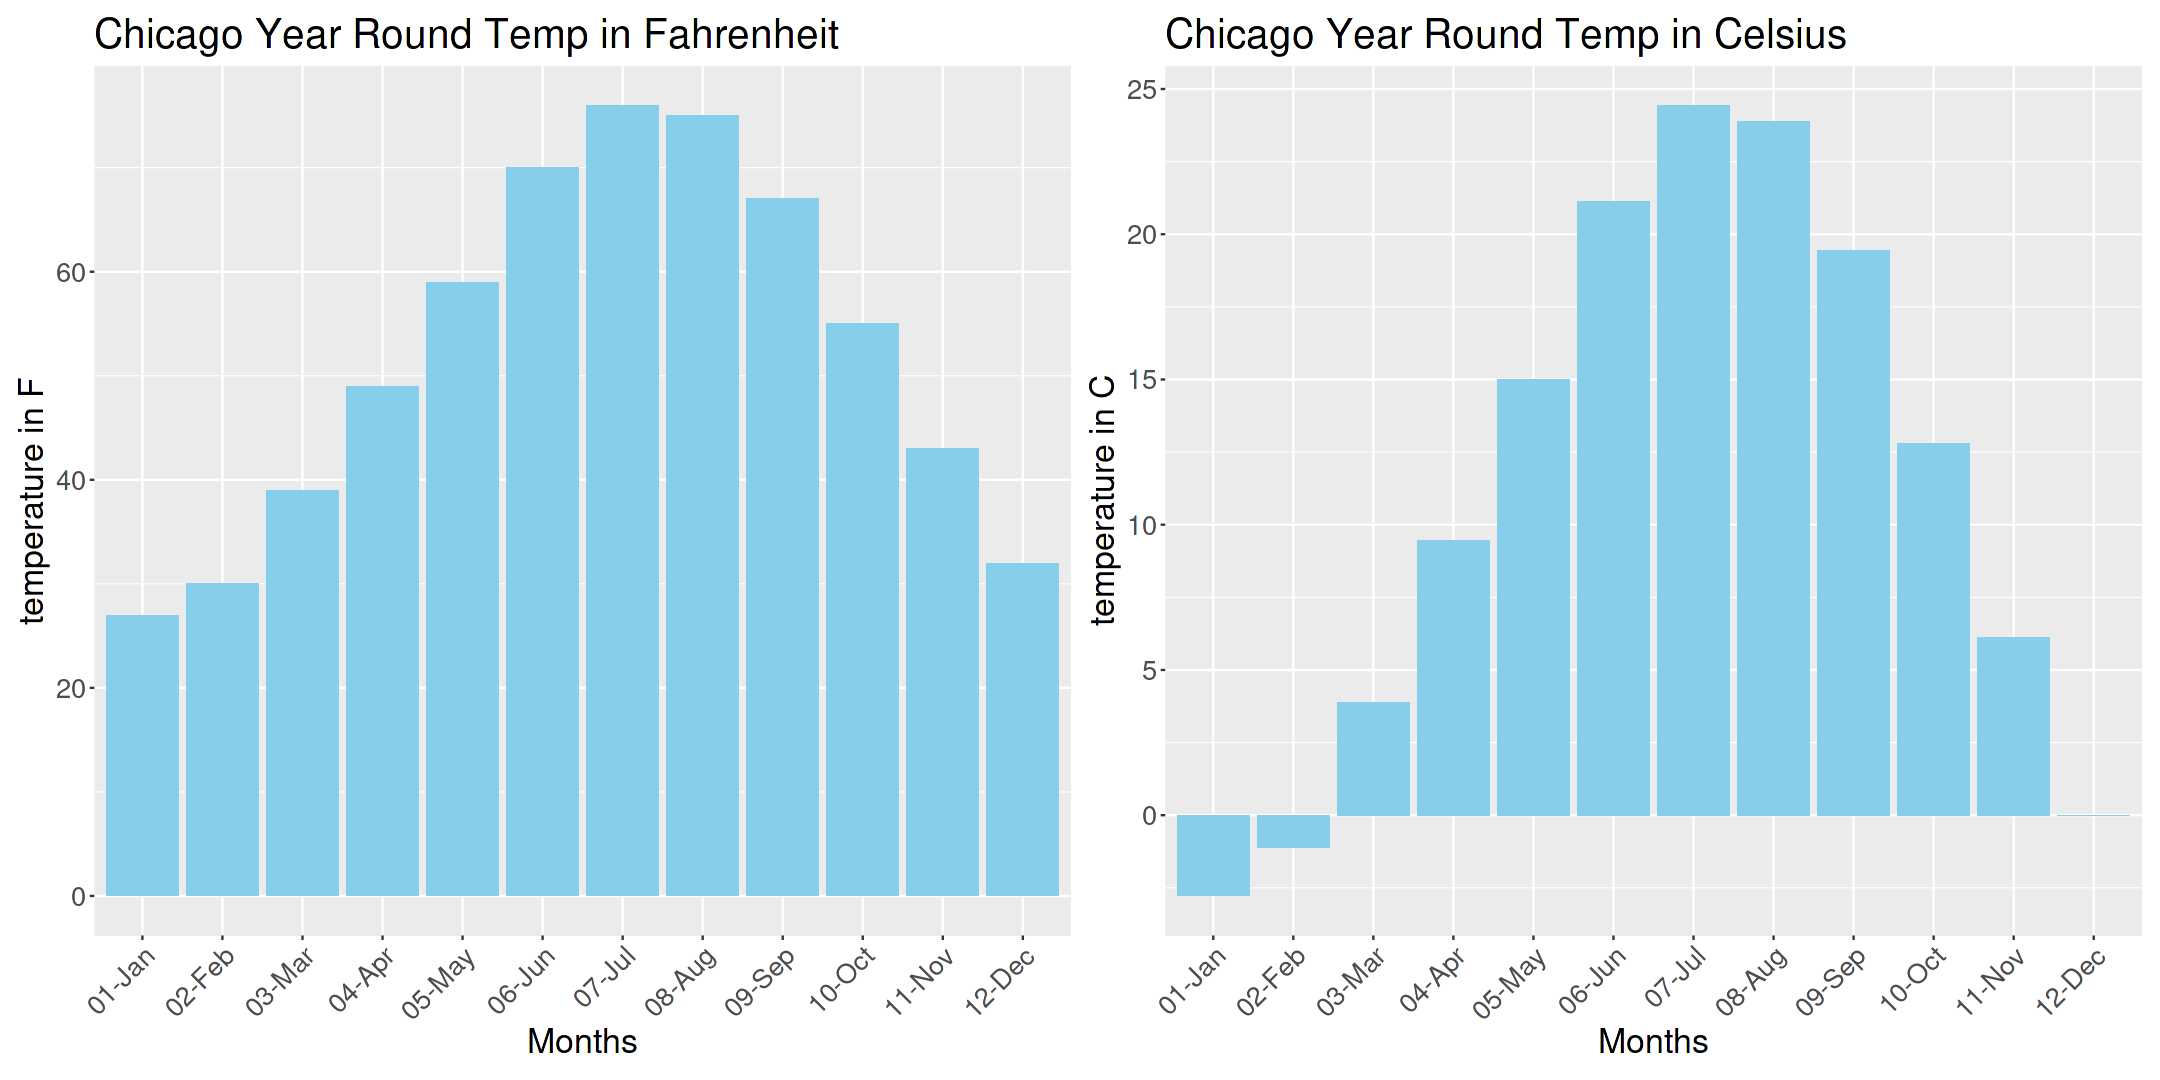

In [18]:
# I have sourced this Data from here -> https://weatherspark.com/y/14091/Average-Weather-in-Chicago-Illinois-United-States-Year-Round
# Chicago temperature(in Fahrenheit).

temp_f <- c(27, 30, 39, 49, 59, 70, 76, 75, 67, 55, 43, 32)
month <- c("01-Jan", "02-Feb", "03-Mar", "04-Apr", "05-May", "06-Jun", "07-Jul", "08-Aug", "09-Sep", "10-Oct", "11-Nov", "12-Dec")

chicago_temp <- data.frame(month, temp_f)

#Adding a celsius column also.

chicago_temp$temp_c = round(((temp_f-32)*5/9),2)
chicago_temp

#Time to plot the graph

g1 <- ggplot(data = chicago_temp)+
geom_bar(mapping = aes(x = month, y = temp_f),stat='identity',fill = "sky blue")+
labs(title = "Chicago Year Round Temp in Fahrenheit", x = "Months", y = "temperature in F") +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

g2 <- ggplot(data = chicago_temp)+
geom_bar(mapping = aes(x = month, y = temp_c),stat='identity',fill = "sky blue")+
labs(title = "Chicago Year Round Temp in Celsius", x = "Months", y = "temperature in C") +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

(g1+global_theme) + (g2+global_theme)

* *On comparing both the graph(month-wise vs chicago temp) we can understand that the most favourable temperature for chicago is from May to October.*
* *External sources imply that the tourist visit during mid June to mid sept and high preference for beach/pool also is durning July and August*
* *Jan to April and Dec are the Winter season and feb being the most coolest of them*
* *So, this confirm's that the weather and seasons are directly related to the rise and fall of the customers rides.*

5. **Overall Customers for Weekdays**

> Now, that we know the most favourable month is May to October. We can also check which days are popular for which customers?

week_of_day,total_customer,percent %,member,member %,casual,casual %
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1-Mon,702521,12.55755,416181,59.24108,286340,40.75892
2-Tue,739831,13.22447,465474,62.91626,274357,37.08374
3-Wed,756027,13.51397,477117,63.10846,278910,36.89154
4-Thu,737528,13.18330,451490,61.21666,286038,38.78334
5-Fri,810421,14.48626,446384,55.08051,364037,44.91949
6-Sat,990948,17.71318,433014,43.69694,557934,56.30306
7-Sun,857134,15.32126,376086,43.87715,481048,56.12285


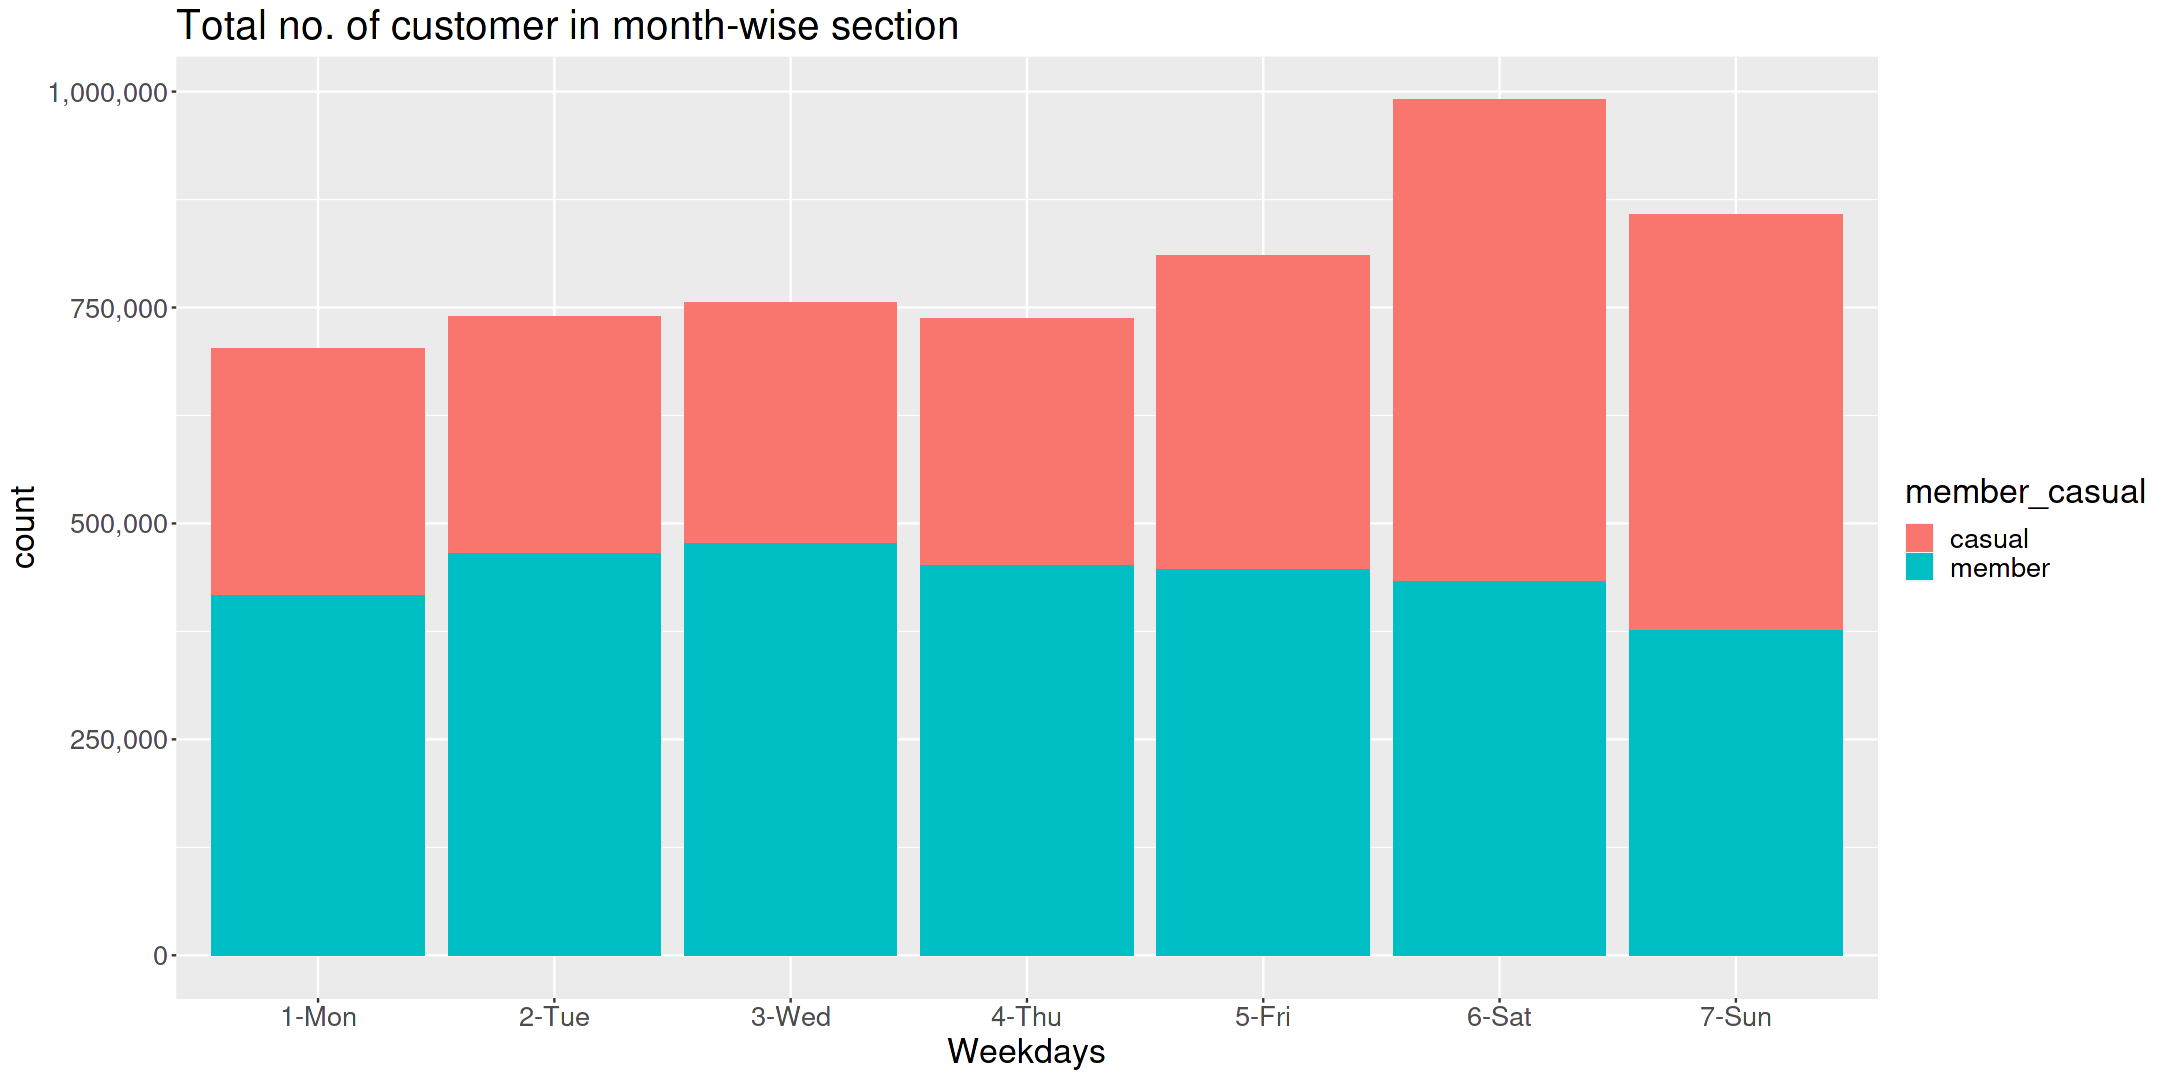

In [19]:
tripdata %>% 
  group_by(week_of_day) %>% 
  summarise(total_customer = length(ride_id), 
           "percent %" = (length(ride_id) / nrow(tripdata)) * 100,
            member = sum(member_casual == "member"),
           "member %" = member / length(ride_id) * 100,
            casual = sum(member_casual == "casual"),
           "casual %" = casual / length(ride_id) * 100)

ggplot(data = tripdata)  + 
geom_bar(aes(x = week_of_day, fill = member_casual)) +
labs(title = "Total no. of customer in month-wise section", x = "Weekdays") + 
scale_y_continuous(labels = scales::comma)+
global_theme

*This graph explains:*
* *Overall the customers are above 700K for each day in the whole year-2021.*
* *The movement of data for casual customers are on weekends starting from friday and increasing on saturday and sunday.*
* *The movement of data for member customers are more towards the weekdays from Monday to Friday.*
* *Members are more stable compare to casual.*

6. **Average Ride Length of Customer on Monthly Records**

> Now, we will check how much time our riders spend on the bicycle?

`summarise()` has grouped output by 'month_year'. You can override using the
`.groups` argument.


month_year,casual,member
<chr>,<dbl>,<dbl>
01-2021 (Jan),25.68459,12.87297
02-2021 (Feb),49.37810,18.02345
03-2021 (Mar),38.11459,13.96565
04-2021 (Apr),38.02605,14.69082
05-2021 (May),38.23513,14.64030
06-2021 (Jun),37.12595,14.67866
07-2021 (Jul),32.79351,14.24070
08-2021 (Aug),28.79078,14.10242
09-2021 (Sep),27.81882,13.73658


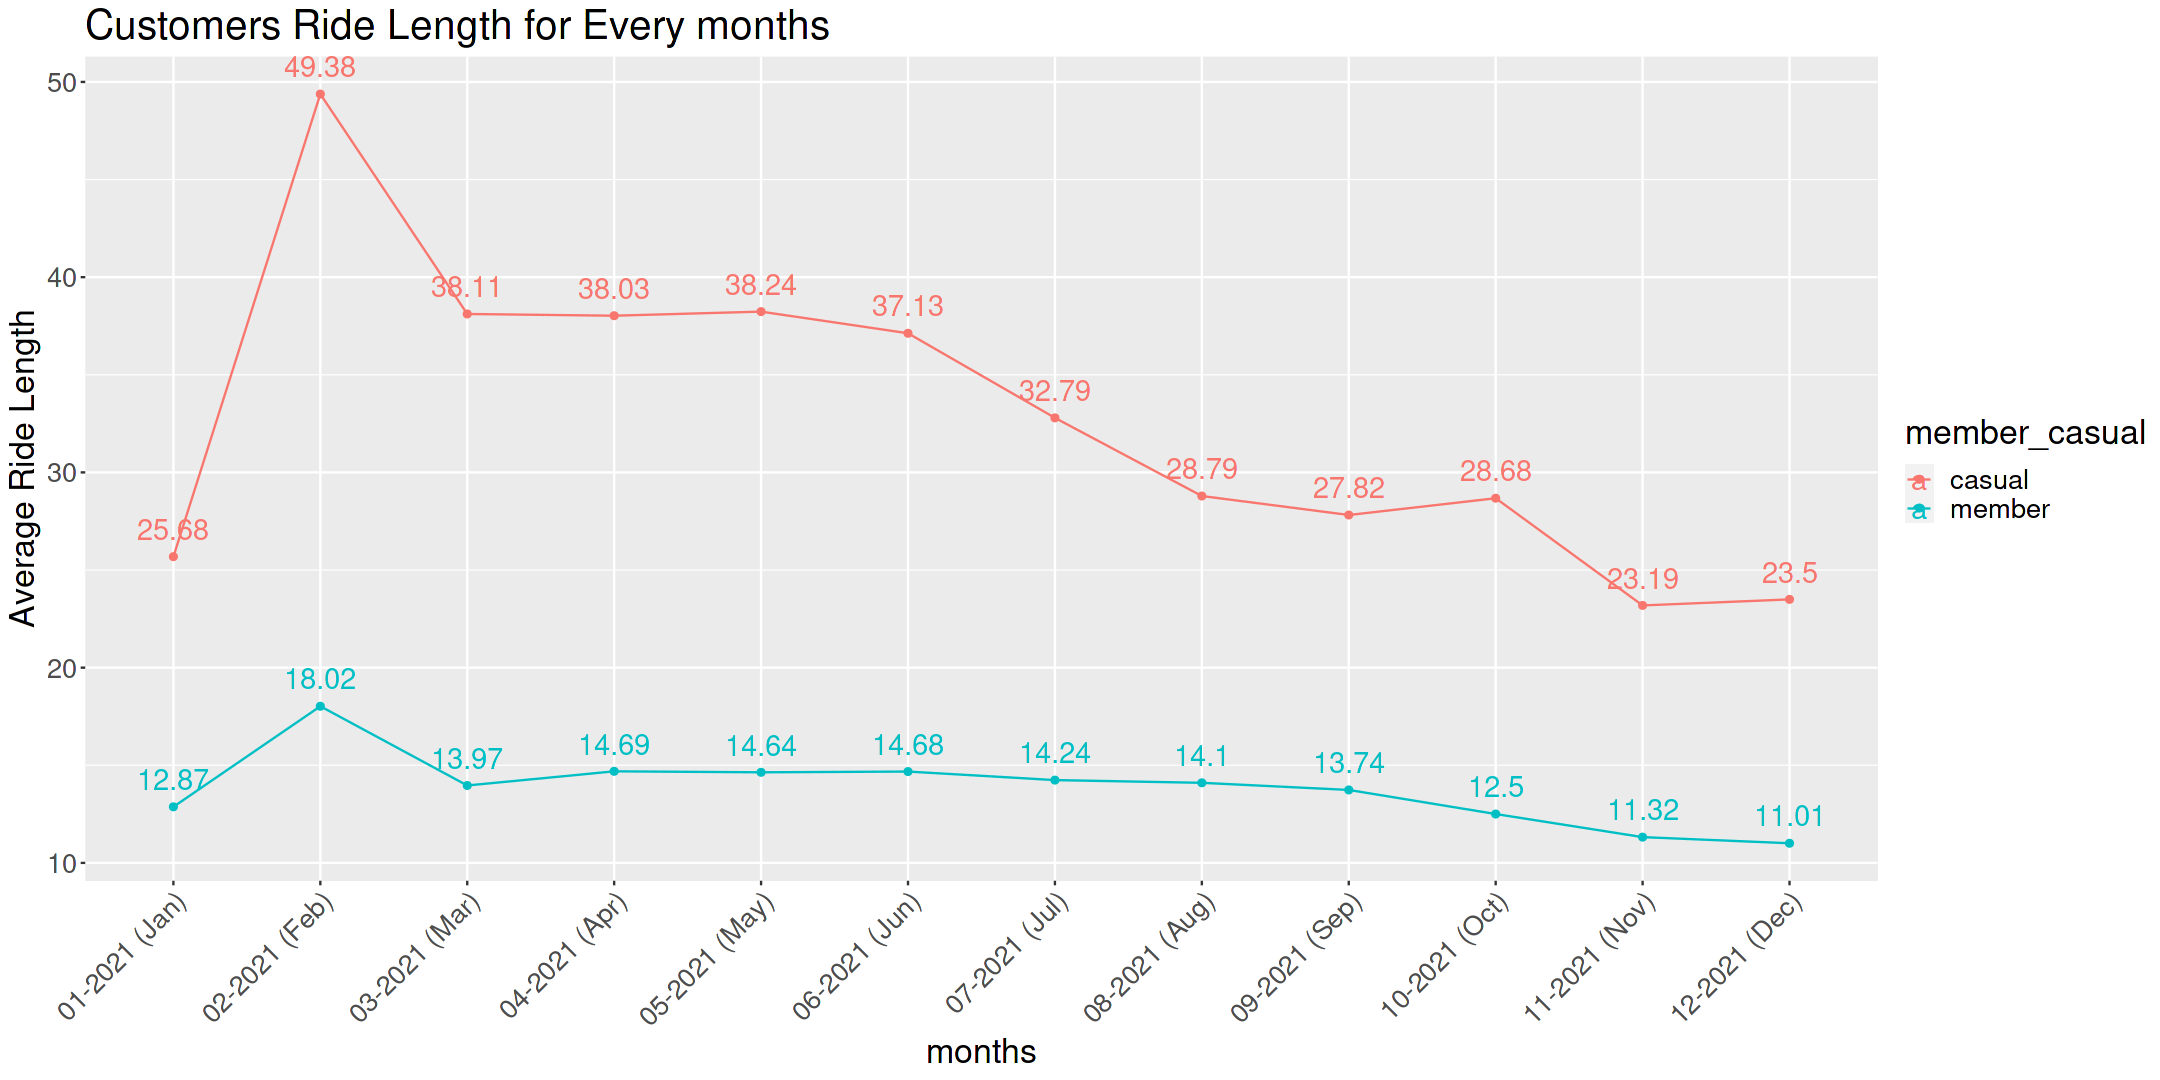

In [20]:
tripdata %>% 
  group_by(month_year, member_casual) %>%
  summarise(mean = mean(total_ride_time)) %>%
  spread(member_casual, mean)

ggplot(data = tripdata, aes(x = month_year, y = total_ride_time, color = member_casual, group = member_casual)) +
labs(title = "Customers Ride Length for Every months", x = "months", y = "Average Ride Length") +
stat_summary(fun.y = mean, geom = "point") +
stat_summary(aes(label=round(..y..,2)), fun.y=mean, geom="text", size=6,vjust = -0.8) +
stat_summary(fun.y = mean, geom = "line") +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
global_theme

*This graph explains:*
* *Casual riders ride the bicycle more than members on average*
* *The pattern for both the riders are similar*
* *The ride pattern indicates that at the starting of the year in month of feb till the month of Oct on average both the riders have a good amount of ride time.*
* *Month - Nov, Dec and Jan are low performing period for both the riders.*

# 6. Act Phase

**Conclusion**

**Objective - How do annual members and casual riders use Cyclistic bikes differently?**

1. Annual Members are more compare to casual riders. 
2. Both the casual riders and annual members prefer the classic and electric bike while only the casual riders use the docked bike.
3. The most favourable period for casual riders are in mid-year (June, July and August) where they are higher than the annual members.
4. This favourable period is supported by the season and temperature of chicago.
5. On weekdays(Monday to Friday), casual riders are less than annual members but on weekends(Saturday and Sunday) casual are more than members.
6. Average ride time of Casual riders are more than annual members for every month.